# Problem 2

We will consider interpolation of higher dimensional functions. Specifically, we will examine the following function:

$$f(x,y)=e^x\sin(y)$$

With this we can construct a polynomial of the form...

$$ p(x,y)=c_0+c_1x+c_2y+c_3xy+c_4x^2+c_5y^2 $$

This polynomial interpolates the function $f$ at the points $(x_i,y_i)$.

$$ p(x_i,y_i)=f(x_i,y_i),\:\:0\leq i\leq 5 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(x, y):
    return np.exp(x)*np.sin(y)

## a).
We can write a linear system of the form $\mathbf{Ac}=\mathbf{f}$ that can be solved to obtain the coefficients $\mathbf{c}=(c_0,\ldots,c_5)^T$.

We start by first writing our polynomial as a dot product between two vectors. Let $\mathbf{p}(x,y) = (1, x, y, xy, x^2, y^2)^T$ and $\mathbf{c}$ be defined as above. Then our polynomial is just given as $\langle \mathbf{p}(x,y),\mathbf{c}\rangle$. To build our linear system we just insert $\mathbf{p}(x_i,y_i)$ as the ith row in our matrix $\mathbf{A}$, and let $\mathbf{f}=(f(x_0,y_0),\ldots,f(x_5,y_5))^T$. The linear system $\mathbf{Ac}=\mathbf{f}$ is then defined as below:

$$
\begin{bmatrix}
    \mathbf{p}^T(x_0,y_0)\\
    \mathbf{p}^T(x_1,y_1)\\
    \mathbf{p}^T(x_2,y_2)\\
    \mathbf{p}^T(x_3,y_3)\\
    \mathbf{p}^T(x_4,y_4)\\
    \mathbf{p}^T(x_5,y_5)
\end{bmatrix}
\begin{bmatrix}
    c_0\\
    c_1\\
    c_2\\
    c_3\\
    c_4\\
    c_5
\end{bmatrix}
=
\begin{bmatrix}
    f(x_0,y_0)\\
    f(x_1,y_1)\\
    f(x_2,y_2)\\
    f(x_3,y_3)\\
    f(x_4,y_4)\\
    f(x_5,y_5)
\end{bmatrix}
$$

## b).
We will consider case where we have the following data points, and solve the linear system given above:

$$ (0,0),\:(0,2),\:(1,0),\:(1,2),\:(2,1),\:(2,3) $$

In [2]:
data = [(0,0),(0,2),(1,0),(1,2),(2,1),(2,3)]

def p(x,y):
    p0 = 1
    if hasattr(x, "shape"):
        p0 = np.ones(x.shape)
        
    return np.array([p0, x, y, x*y, x**2, y**2])

A = np.array([p(xi, yi) for xi,yi in data])
f = np.array([func(xi, yi) for xi,yi in data])
print(A.shape)
print(f.shape)

(6, 6)
(6,)


In [3]:
c = np.linalg.solve(A, f)
for i, coeff in enumerate(c):
    print('c%i = %f' % (i,coeff))

c0 = 0.000000
c1 = -0.949163
c2 = 5.059193
c3 = 0.781215
c4 = 0.949163
c5 = -2.302272


## c).
We will plot our two dimensional polynomial $p$ over the intervals $x\in[-1,3],\:y\in[-1,3]$. We will also compare this to the actual function value plotted on the same interval.

In [4]:
def pc(X, Y, c):
    Z = np.array([np.ones(X.shape), X, Y, X*Y, X**2, Y**2])
    mesh_c = c.reshape((-1,) + (1,)*(Z.ndim - 1))
    
    return np.sum(mesh_c*Z, axis=0)

<IPython.core.display.Javascript object>


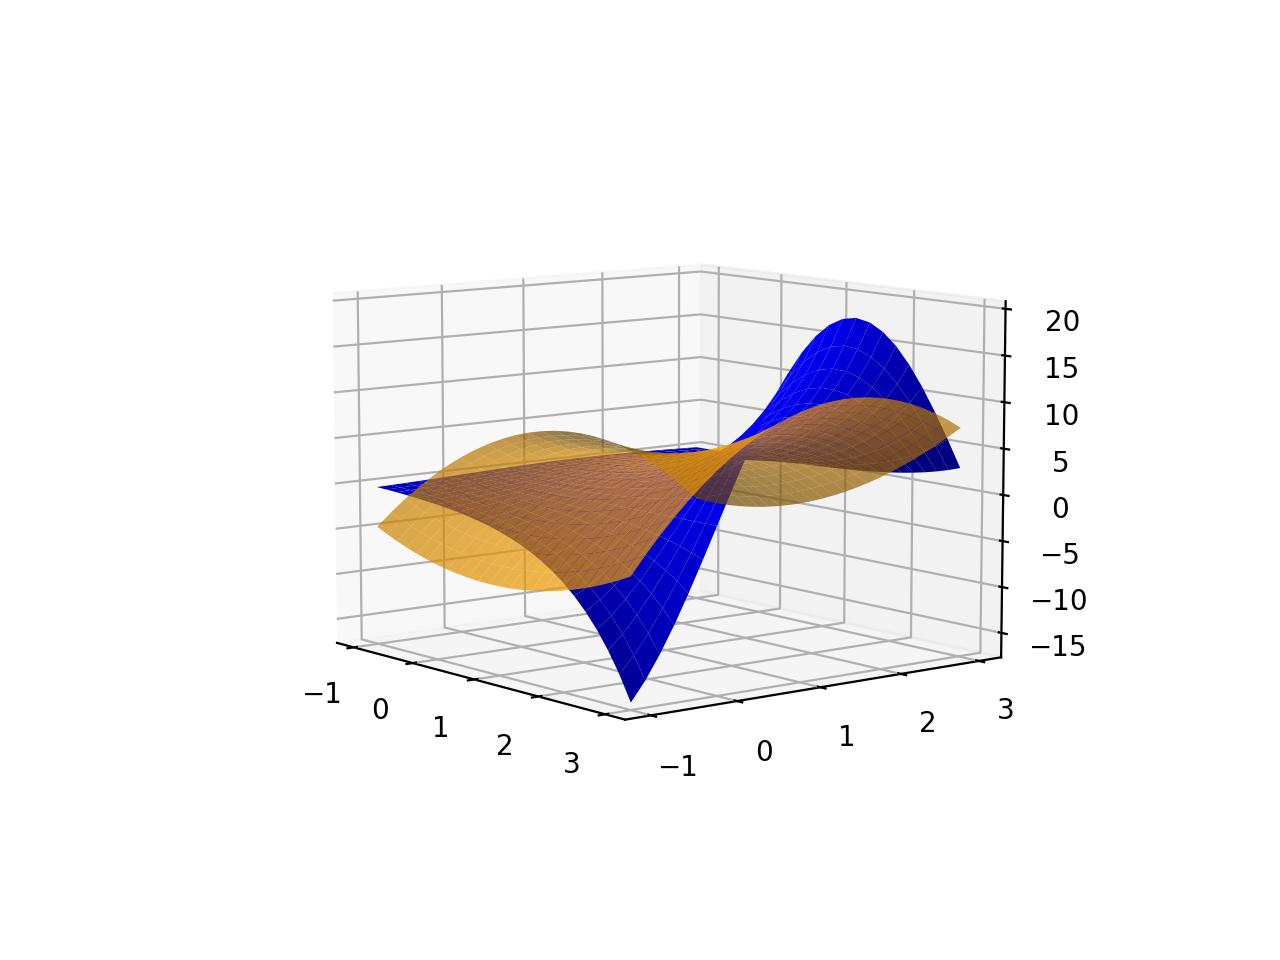

In [6]:
%matplotlib notebook
# Meshgrid for evaluating functions
X, Y = np.meshgrid(np.linspace(-1,3,25), np.linspace(-1,3,25))

#Plotting 3D surface
fig = plt.figure()
ax = plt.axes(projection='3d')

#Analytic function
ax.plot_surface(X, Y, func(X, Y), color='blue')

#Polynomial approximation
ax.plot_surface(X, Y, pc(X, Y, c), color='orange', alpha=0.7);
# fig.tight_layout()
# ax.set_title(r'$f(x,y)=e^x\sin(y)$ and its Interpolation');

In the above plot we see our analytic function given by the blue surface, and the polynomial interpolation given by the organge surface. The approximation is pretty good, but we notice the polynomial is flatter in general.

In [7]:
plt.savefig('surf.png', dpi=300)

In [12]:
plt.savefig('surf1.png', dpi=300)

In [13]:
plt.savefig('surf2.png', dpi=300)